# Projet équation différentielle



### Methodes à pas fixe

On commence tout d'abord par définir des méthodes à pas fixe, par les tester et par montrer leur ordre de convergence. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_euler_explicit(f,t0,tf,x0,dt):#t0 et tf temps de début et de fin de la simulation
    X=x0#initialisation
    t=t0
    x_arr=[X]
    t_arr=[t]#espace de stockage
    while t<tf:
        X=X+dt*f(X,t)
        t=t+dt
        x_arr.append(X)
        t_arr.append(t)
    return np.array(t_arr), np.array(x_arr)
    
    


In [3]:
def solve_heun(f,t0,tf,x0,dt):#t0 et tf temps de début et de fin de la simulation
    X=x0#initialisation
    t=t0
    x_arr=[X]
    t_arr=[t]#espace de stockage
    while t<tf:
        X=X+0.5*dt*(f(X,t)+f(X+dt*f(X,t),t+dt))
        t=t+dt
        x_arr.append(X)
        t_arr.append(t)
    return np.array(t_arr), np.array(x_arr)

### Tests et convergence des schémas

On a ainsi defini deux fonctions de résolution d'équations différentielles à pas fixe, l'une utilisant le schéma d'euler explicite, l'autre utilisant le schéma de Heun.

On va maintenant illustrer ces deux schémas d'intégration et montrer leur convergence à l'ordre 1 pour euler et à l'ordre 2 pour Heun.

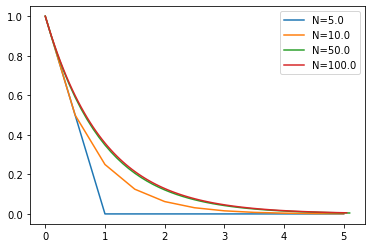

In [4]:
#Pour euler explicite

def f(x,t):
    return -x
x0=1
t0=0
tf=5
Dt=[1,0.5,0.1,0.05]
for dt in Dt:
    T,X=solve_euler_explicit(f,t0,tf,x0,dt)
    plt.plot(T,X, label=f"N={5/dt}")
    plt.legend()
plt.show()



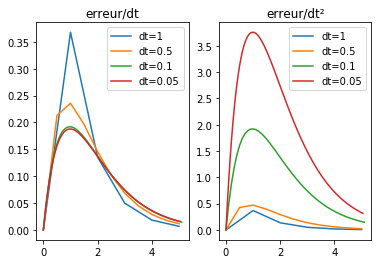

In [5]:
def f_reel(x,t):
    return np.exp(-t)

Dt=[1,0.5,0.1,0.05,]
fig, axes=plt.subplots(1,2)

for dt in Dt:
    T,X=solve_euler_explicit(f,t0,tf,x0,dt)
    X_reel=f_reel(X,T)
    erreur=np.abs(X_reel-X)
    axes[0].plot(T,erreur/dt,'-', label=f'dt={dt}')
    axes[0].legend()
    axes[0].set_title('erreur/dt')
    axes[1].plot(T,erreur/dt**2,'-',label=f'dt={dt}')
    axes[1].legend()
    axes[1].set_title('erreur/dt²')
plt.show()



On observe que, dans le cas de l'erreur/dt, la valeur du maximum diminue quand le nombre de points augmente. Il semble donc possible de trouver une constante indépendante de dt telle que la valeur erreur/dt soit bornée. Par contre dans le cas erreur/dt², la valeur du maximum augmente lorsque dt diminue. Il est donc peu problable de trouver une constante permettant de boner erreur/dt².

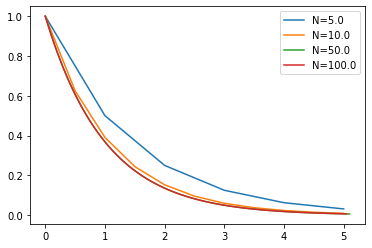

In [6]:
#Pour Heun

def f(x,t):
    return -x
x0=1
t0=0
tf=5
Dt=[1,0.5,0.1,0.05]
for dt in Dt:
    T,X=solve_heun(f,t0,tf,x0,dt)
    plt.plot(T,X, label=f"N={5/dt}")
    plt.legend()
plt.show()


#On observe une convergence bcp plus rapide

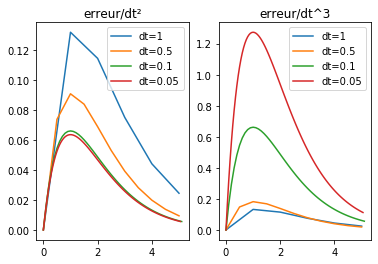

In [7]:
def f_reel(x,t):
    return np.exp(-t)

Dt=[1,0.5,0.1,0.05,]
fig, axes=plt.subplots(1,2)

for dt in Dt:
    T,X=solve_heun(f,t0,tf,x0,dt)
    X_reel=f_reel(X,T)
    erreur=np.abs(X_reel-X)
    axes[0].plot(T,erreur/dt**2,'-', label=f'dt={dt}')
    axes[0].legend()
    axes[0].set_title('erreur/dt²')
    axes[1].plot(T,erreur/dt**3,'',label=f'dt={dt}')
    axes[1].legend()
    axes[1].set_title('erreur/dt^3')
plt.show()

De la même manière que pour le schéma d'intégration par Euler explicite, on illustre la convergence d'ordre 2 de Heun.

### Méthode à pas variable

##### Théorie

On définit l'erreur (absolue) locale par :
$$ e^{j+1} = \left(x^j + \int_{t_j}^{t_{j+1}} f(s,x(s))ds\right) -x^{j+1} = x(t_{j+1})-x^{j+1} $$

avec $x(t_{j+1})$ la solution "réelle" au temps $t_{j+1}$, mais initialisée à partir de la solution approchée $x^j$.
On veut montrer que $$ ||e^{j+1}||=\Delta t \frac{||f(t_{j+1},x^{j+1})-f(t_j,x^j)||}{2} +O(\Delta t^3)$$ 

Tout d'abord, par un developpement de Taylor ($f$ de classe $C^1$ donc $x$ est $C^2$).

\begin{align}
x(t_{j+1})&=x(t_j+\Delta t)\\
&=x^j +\Delta t \; \dot{x}(t_j) + \frac{\Delta t^2}{2}\;\ddot{x}(t_j)+O(\Delta t ^3)\\
&=x^j +\Delta t \; f(t_j,x^j)+\frac{\Delta t^2}{2} \left(\partial_t f(t_j,x^j)+\partial_x f(t_j,x^j)\;f(t_j,x^j)\right)+O(\Delta t^3)\\
&=x^{j+1}+\Delta t \; f(t_j,x^j)+\frac{\Delta t^2}{2} \left(\partial_t f(t_j,x^j)+\partial_x f(t_j,x^j)\;f(t_j,x^j)\right)+O(\Delta t^3)
\end{align}

De la même manière on a 
$$f(t_{j+1},x^{j+1})-f(t_j,x^j)=\Delta t \;\partial_t f(t_j,x^j)+ \Delta t \;\partial_x f(t_j,x^j)\;.f(t_j,x^j)$$

d'où l'égalité recherchée $||e^{j+1}||=\Delta t \frac{||f(t_{j+1},x^{j+1})-f(t_j,x^j)||}{2} +O(\Delta t^3)$ 

En étudiant l'expression de $e^{j+1}$ trouvée précédemment après développement de Taylor, on obtient que $e^{j+1}=O(\Delta t^2)$

Ainsi,si, par exemple l'erreur est deux fois plus grande que la tolérance, le pas de temps devra être divisé par $\sqrt{2}$ du fait de la dépendance de l'erreur en $\Delta t^2$. D'où la formule $\Delta t_{new}= \Delta t . \sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$

Présentons à présent le schéma d'intégration qui utilise ce changement de pas de temps.



##### Fonction à pas variable

Les explications des pas de la fonction demandée  sont fournies sous forme de commentaires directement sur la fonction python (fournie).

In [8]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    #on donne dtmin et dtmax comme fourchette de valeur possible pour le pas de tps dt qui va varier à chaque itération
    #atol est la tolérance absolue utilisée pour l'expression de dt_new
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)#t_next vaut t_j+1 et x_next vaut x_j+1 trouvé en utilisant 
                                                                    #la méthode d'euler explicite 
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2) #linalg.norme(x_back-x)/2 vaut environ ||e_j+1|| 
            dt = 0.9 * dt * np.sqrt(ratio_abs_error)#on applique donc la formule de dt_new, avec une marge de sécurité en plus
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2 #on verifie que le dt_new est bien dans la fourchette imposée
            t, ti, x = t_next, ti_next, x_next #on donne leur nvelle valeur à t, ti et x
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

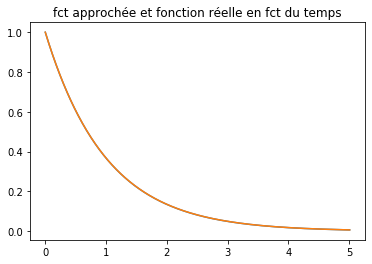

In [12]:
def f(x):
    return -x
def f_reel(t):
    return np.exp(-t)
t0=0
x0=1
t_f=5
ts,xs=solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6)
xr=f_reel(ts)
plt.plot(ts,xs.T)
plt.plot(ts,xr)
plt.title("fct approchée et fonction réelle en fct du temps")
plt.show()

On voit que les deux graphes ne sont pas discernables. L'erreur d'intégration numérique semble donc être suffisamment faible. Le schéma d'intégration semble donc plus performant que ceux présentés précédemment.